In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from PIL import Image

In [3]:
img = Image.open('A.png')

In [4]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [5]:
ar = np.array(img)

In [6]:
ar.shape


(748, 359, 3)

In [7]:
ar[190,126]

array([255, 255, 255], dtype=uint8)

In [8]:
z = np.array(np.where(ar[:,:] == [255,255,255]))

In [54]:
centers = np.array([[187,168],[190,126],[225,180],[229,141],[264,227],[264,193],[266,152],[282,215],[303,236],
              [303,198],[306,155],[325,221],[325,178],[323,136],[343,246],[349,205],[347,162],[340,120],[365,230],
             [365,185],[362,143],[386,212],[385,164],[380,122],[400,233],[405,190],[405,147],[420,214],[424,165],[424,125],
              [455,165],[460,125]],dtype = 'float')

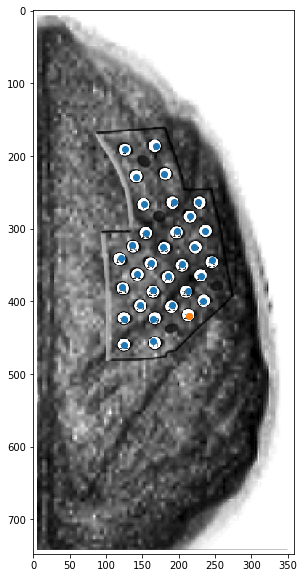

In [10]:
i = 31
plt.figure(figsize=(15,10))
plt.scatter(centers[:,1],centers[:,0])
plt.scatter(214,420)
plt.imshow(ar)

In [11]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [12]:
df = pd.read_csv("ECoG.csv")

In [56]:
centers[:,0] = (centers[:,0] - centers[:,0].mean())/centers[:,0].std()
centers[:,1] = (centers[:,1] - centers[:,1].mean())/centers[:,1].std()

In [14]:
XY_multiple = np.empty((sum(Z),2))
count = 0
for i in range(centers.shape[0]):
    XY_multiple[count:count+Z[i],:] = centers[i,:]
    print(centers[i,:])
    count += Z[i]

NameError: name 'Z' is not defined

In [348]:
Sigma = np.cov(XY_multiple.T)
M = np.array([XY_multiple[:,0].mean(),XY_multiple[:,1].mean()])

In [372]:
np.abs(df.values[100:220:100,1:]).shape


(2, 32)

In [328]:
Z = np.array(Z,dtype = int)

In [41]:
centers.shape

(32, 2)

In [44]:
np.diag([2,2,2])

array([[2, 0, 0],
       [0, 2, 0],
       [0, 0, 2]])

In [47]:
np.diag(np.abs(df.values[100:120:100,1:].flat))

array([[ 3.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 18.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 71.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 48.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 63.]])

In [60]:
print(normal_features(np.abs(df.values[100:120:100,1:]),centers))
print(signal_cov(np.abs(df.values[100:120:100,1:]).flat,centers))
print(np.cov(centers.T,fweights=np.abs(df.values[100:120:100,1:].flat)))

[[ 0.20394903  0.24445353  0.08302502  0.74592393 -0.20434737  1.10215543]]
[[ 0.8057207  -0.18403829]
 [-0.18403829  1.10905311]]
[[ 0.74592393 -0.20434737]
 [-0.20434737  1.10215543]]


In [21]:
def normal_features(Signal,centers):
    if len(Signal.shape) == 1:
        S = np.array(Signal,dtype = int)
        #print(S)
        XY_multiple = np.empty((sum(S),2))
        count = 0
        for i in range(centers.shape[0]):
            XY_multiple[count:count+S[i],:] = centers[i,:]
            count += S[i]
        Sigma = np.cov(XY_multiple.T)
        M = np.array([XY_multiple[:,0].mean(),XY_multiple[:,1].mean()])
        return np.array([1/(2*np.pi*np.linalg.det(Sigma)),M[0],M[1],Sigma[0,0],Sigma[1,0],Sigma[1,1]])
    res = np.empty((Signal.shape[0],6))
    for i,S in enumerate(Signal):
       # print(S)
        S = np.array(S,dtype = int)
        XY_multiple = np.empty((sum(S),2))
        count = 0
        for j in range(centers.shape[0]):
            XY_multiple[count:count+S[j],:] = centers[j,:]
            count += S[j]
        Sigma = np.cov(XY_multiple.T)
       # print(Sigma)
        M = np.array([XY_multiple[:,0].mean(),XY_multiple[:,1].mean()])
        res[i,:] = np.array([1/(2*np.pi*np.linalg.det(Sigma)),M[0],M[1],Sigma[0,0],Sigma[1,0],Sigma[1,1]])
    return res

In [51]:
def signal_cov(signal,centers):
    N = sum(signal)
    A = np.diag(signal)
    return 1/(N-1)*np.dot(centers.T,np.dot(A,centers))

In [16]:
import ECoG

In [17]:
x,y = ECoG.read_ECoG_from_csv("ECoG.csv","Motion.csv")
data = ECoG.ECoG(x,y,downsample = True)
filtered = data.bandpass_filter(lowcut=0.2,highcut=60,fs = 100,inplace=True)
#works for a long time, needs about 1 hour to preprocess 15 min experiment
freq = np.array([i for i in range(10,150,15)]) 
scalo, motion,time = data.scalo(1,freq,start = 0,end = 20000) # preprocess first 3000(30 sec) objects of data

In [18]:
scalo = scalo / 100

In [19]:
X = np.empty((scalo.shape[0],6*scalo.shape[2]*scalo.shape[3]))

In [22]:
for i in range(scalo.shape[2]):
    for j in range(scalo.shape[3]):
        print(i,j)
        X[:,6*(j + scalo.shape[3]*i):6*(j + scalo.shape[3]*i+1)] = normal_features(scalo[:,:,i,j],centers)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11


In [28]:
from sklearn.cross_decomposition import PLSRegression
model = PLSRegression(50)

In [27]:
motion = (motion - motion.mean())/motion.std()


In [32]:
from scipy.stats import pearsonr

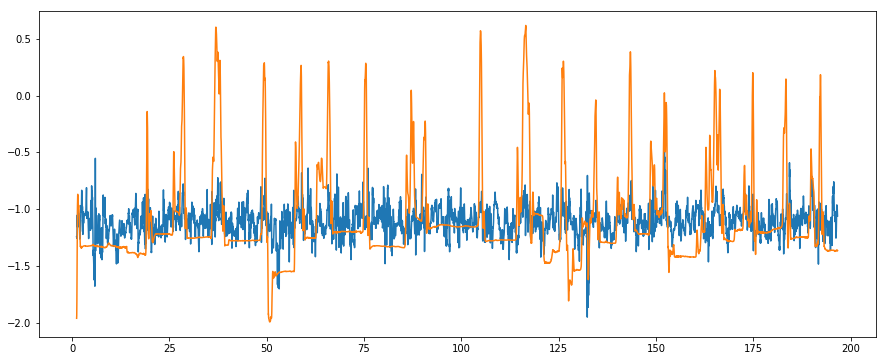

In [31]:
model.fit(X,motion)
Y_pred = model.predict(X) 
plt.figure(figsize = (15,6))
plt.plot(time[:],Y_pred[:,0])
plt.plot(time[:],motion[:,0])

In [33]:
pearsonr(Y_pred[:,0],motion[:,0])

(0.30288810743119815, 0.0)

<IPython.core.display.Javascript object>


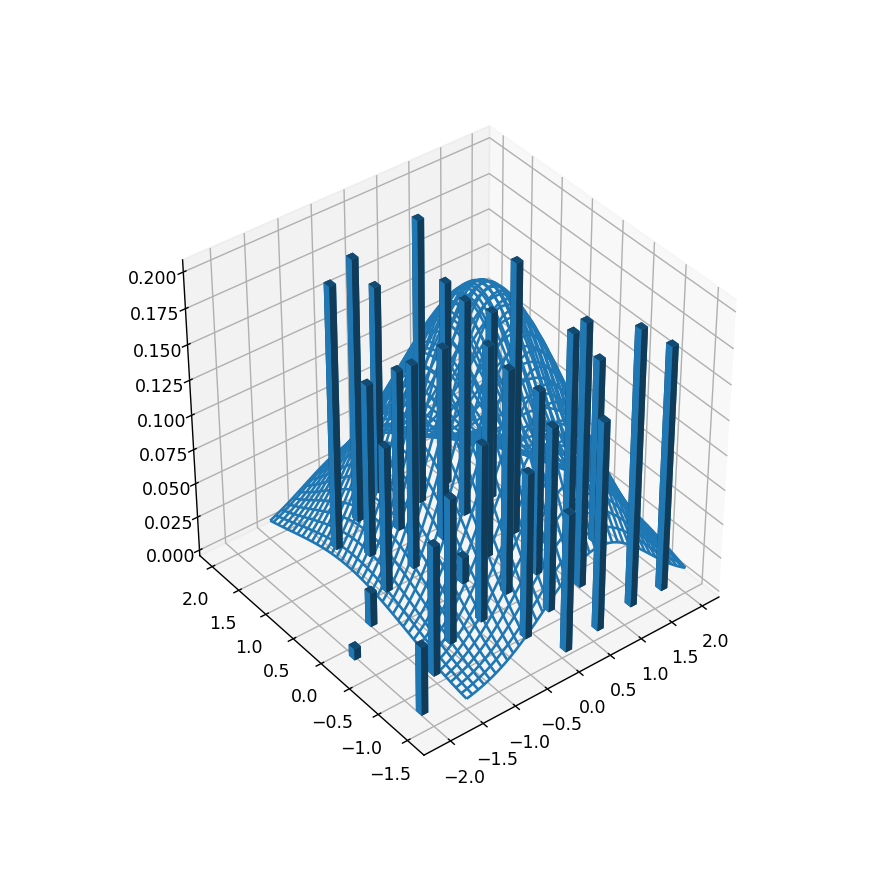

2.409079494077367


In [370]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
Z = np.abs(df.values[100,1:])
ax.bar3d(centers[:,0], centers[:,1],np.zeros(32),0.1,0.1,Z/max(Z) * 1/(2*np.pi*np.linalg.det(Sigma)))

args = [1/(2*np.pi*np.linalg.det(Sigma)),M[0],M[1],Sigma[0,0],Sigma[1,0],Sigma[1,1]]
x, y = np.mgrid[-1.5:2.0:0.03, -1.5:2.0:0.03]
xy = np.column_stack([x.flat, y.flat])
z_gaus = gaussian(normal_features(Z,centers),xy)
z_gaus = z_gaus.reshape(x.shape)
ax.plot_wireframe(x,y,z_gaus)
print(np.linalg.norm(Z/100 - gaussian(args,centers)))

In [16]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


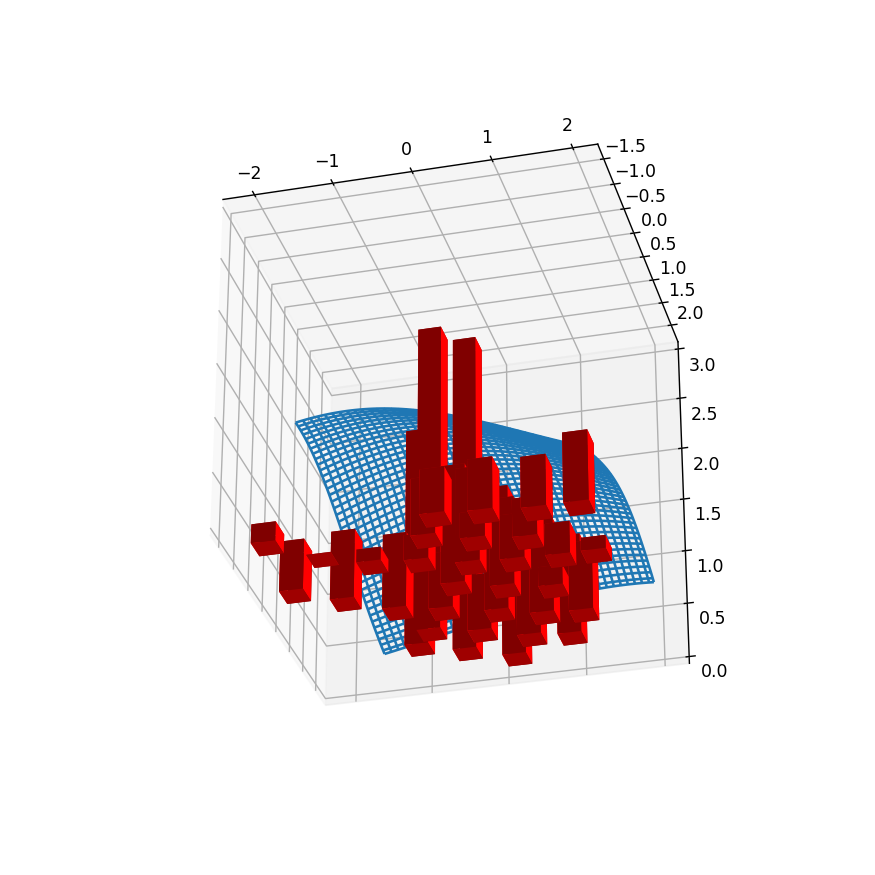

In [300]:
%matplotlib notebook
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
def animate(i):
    ax.clear()
    Z = (np.abs(df.values[100 *i,1:]) - np.abs(df.values[100 * i,1:]).mean())/np.abs(df.values[100 * i,1:]).std()
    x, y = np.mgrid[-1.5:2.0:0.03, -1.5:2.0:0.03]

    xy = np.column_stack([x.flat, y.flat])
    x0 = np.array([2,0,0,0.05,0,0.05])
    w = minimize(loss,x0=x0,args=(centers,np.abs(X)),method='BFGS',constraints=cons)
    t = gaussian(w.x,xy)
    t = t.reshape(x.shape)
   # ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(x,y,t)
    ax.bar3d(centers[:,0], centers[:,1],np.zeros(32),0.3,0.3,np.abs(Z),color='red')

    
    
steps = np.arange(0,100,1)
ani = animation.FuncAnimation(fig, animate,steps,interval=500,
                                repeat_delay=10000,blit = True)
fig.show()



In [42]:
from scipy.interpolate import interp2d

In [208]:
from scipy.optimize import minimize

In [269]:
def gaussian(args,x):
    res = np.empty((x.shape[0]))
    B = args[0]
    M = args[1:3]
    cov = args[3:6]
    Sigma = np.array([[cov[0],cov[1]],[cov[1],cov[2]]])
    for i in range(x.shape[0]):
        x0 = x[i,:]
        x0 = x0 - M
        res[i] = B * np.exp( -0.5 * np.dot(x0,np.dot(np.linalg.inv(Sigma),x0.T)))
       # print(res[i])
    return res

In [270]:
def loss(args,x,z0):
    return np.linalg.norm(gaussian(args,x)-z0)

In [271]:
def approximation(xy,z,args_init):
    cons = [{'type': 'ineq', 'fun': lambda x:  x[3] * x[5] > x[4]**2}]
    w = minimize(loss,x0=x0,args=(XY,np.abs(X)),method='BFGS',constraints=cons)
    return w

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


[1.0969826  0.69403393 0.62132691 0.17869771 0.09342115 0.12889032]


<IPython.core.display.Javascript object>


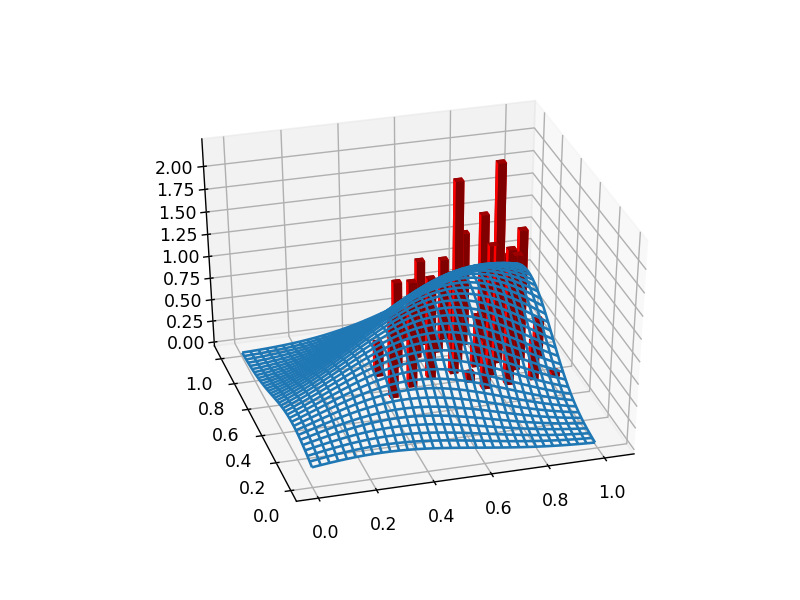

In [276]:
from scipy.stats import multivariate_normal
Z = (np.abs(df.values[300,1:]) - np.abs(df.values[300,1:]).mean())/np.abs(df.values[300,1:]).std()
x, y = np.mgrid[0.:1.0:0.03, 0:1.0:0.03]

xy = np.column_stack([x.flat, y.flat])
x0 = np.array([2,(centers[:,0]/max(centers[:,0])).mean(),(centers[:,1]/max(centers[:,1])).mean(),0.05,0,0.05])
XY = np.column_stack([centers[:,0]/max(centers[:,0]), centers[:,1]/max(centers[:,1])])
w = minimize(loss,x0=x0,args=(XY,np.abs(X)),method='BFGS',constraints=cons)
print(w.x)
t = gaussian(w.x,xy)


t = t.reshape(x.shape)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')


ax.bar3d(centers[:,0]/max(centers[:,0]), centers[:,1]/max(centers[:,1]),np.zeros(32),0.03,0.03,np.abs(X),color='red')
#ax.plot_wireframe(x,y,z,cmap = 'hot')
ax.plot_wireframe(x,y,t)
#ax.plot_wireframe(x,y,z)

plt.show()